## Seth Harriet 
### 11/19/21


## Project Prep

The project will involve modeling a certain system that serves as a model for many real applications - a spring-mass-damper system. To start with we will model the non-forced (i.e. $F=0$) as shown below:

![image info](./spring_mass_damper.png)

The governing equation for determining the x versus time is: 

$\large \frac{d^2x}{dt^2} + 2 \gamma \frac{dx}{dt} + k^2 x = F(t)$

Here, $k$ is the spring constant, and $\gamma$ is the damping factor.

For now take the values above as follows:

$k^2 = $48 N/m/kg

$\gamma = $0.7 1/s

$x(0)=0$

$\frac{dx}{dt}\rvert_{t=0}$=0.2 m/s

$0 <= t <= 5$ s

$F(t) = 0$

### Assignment
By Wednesday Dec. 1, solve the 2nd order ODE above using RK3 for the specified values.

Step Size: 0.005005005005005005


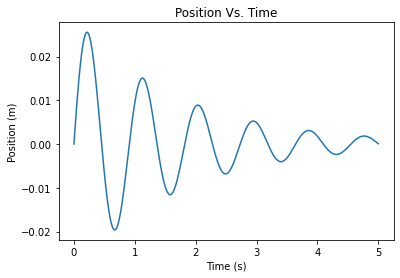

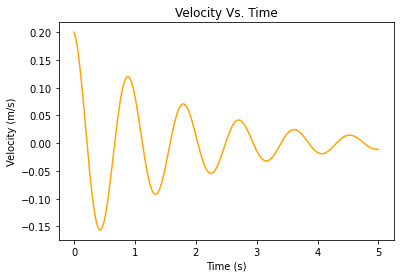

In [1]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

fx = lambda t,x,v: v     #fx/dt which amounts to velocity
fv = lambda t,x,v: -1.4*v - 48*x #fv/dt which amounts to acceleration 


def rk3_x(ti, xi, vi, c1, c2, c3, a2, a3, b21, b31, b32, h):
    K1 = fx(ti,xi,vi)
    K2 = fx(ti+a2*h, xi+b21*K1*h,vi)
    K3 = fx(ti+a3*h, xi+b31*K1*h+b32*K2*h,vi)  
    xip1 = xi+(c1*K1+c2*K2+c3*K3)*h
    return xip1


def rk3_v(ti, xi, vi, c1, c2, c3, a2, a3, b21, b31, b32, h):
    K1 = fv(ti, xi, vi)
    K2 = fv(ti+a2*h, xi, vi+b21*K1*h)
    K3 = fv(ti+a3*h, xi, vi+b31*K1*h+b32*K2*h)  
    xip1 = vi+(c1*K1+c2*K2+c3*K3)*h
    return xip1

# Classic RK3 Method

c1 = 1./6
c2 = 4./6
c3 = 1./6
a2 = 1./2
a3 = 1.
b21 = 1./2
b31 = -1.
b32 = 2.

a = 0.0    #initial value for t
b = 5    #final value for t


n = 1000  #number of t steps
h = (b-a)/(n-1)   #step size
x_rk3 = np.zeros(n)
t_rk3 = np.zeros(n)
v_rk3 = np.zeros(n)

iv = 0
x_rk3[0] = iv      # Initial X Position
t_rk3[0] = a       # Initial Time
v_rk3[0] = 0.2     # Initial Velocity m/s

for i in range(1,n):
    
    t_rk3[i] = a + i*h    #The next time we observing
    
    v_rk3[i] = rk3_v(t_rk3[i-1],x_rk3[i-1],v_rk3[i-1],c1,c2,c3,a2,a3,b21,b31,b32,h) #I need a Velocity to use to find the position at the next time
    
    x_rk3[i] = rk3_x(t_rk3[i-1],x_rk3[i-1],v_rk3[i-1],c1,c2,c3,a2,a3,b21,b31,b32,h)    #The position at the selected time
    
    
    


print(f"Step Size: {h}")
plot1=plt.figure(1)
plt.plot(t_rk3,x_rk3)
plt.title("Position Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plot2=plt.figure(2)
plt.plot(t_rk3,v_rk3, color="orange")

plt.title("Velocity Vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()
    